**The notebook demonstrates a multi-label text classification task using**

**TF-IDF features and Logistic Regression** 

**Performance Summary (TF-IDF + Logistic Regression)**

| Label           | Accuracy | Precision | Recall | F1-Score |
|----------------|----------|-----------|--------|----------|
| Toxic           | 0.96     | 0.90      | 0.62   | 0.73     |
| Severe_Toxic    | 0.99     | 0.55      | 0.21   | 0.31     |
| Obscene         | 0.98     | 0.91      | 0.64   | 0.75     |
| Threat          | 1.00     | 0.50      | 0.09   | 0.16     |
| Insult          | 0.97     | 0.81      | 0.51   | 0.63     |
| Identity_Hate   | 0.99     | 0.80      | 0.16   | 0.27     |

This notebook is a **critical first step** in the toxic comment classification pipeline.
- It helps identify preprocessing needs and modeling strategies.
- Recommended improvements:
  - Address class imbalance (e.g., SMOTE, class weights).
  - Incorporate advanced preprocessing techniques.
  - Explore deep learning alternatives like **DistilBERT** or **BERT** for better recall on rare labels.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

from sklearn.multiclass import OneVsRestClassifier
import re


##  Load the Cleaned Data

In [8]:
# Load data
df = pd.read_csv("cleaned_comments_df.csv")
df["comment_text"] = df["comment_text"].astype(str)


## Split the Data

In [3]:
X = df["comment_text"]
y = df[label_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## TF-IDF Vectorization

In [4]:
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


## Train One-vs-Rest Logistic Regression

In [5]:
model = OneVsRestClassifier(LogisticRegression(solver='liblinear', C=1.0))
model.fit(X_train_tfidf, y_train)


OneVsRestClassifier(estimator=LogisticRegression(solver='liblinear'))

## Evaluate the Model

In [6]:
y_pred = model.predict(X_test_tfidf)

for i, label in enumerate(label_cols):
    print(f"\nClassification report for {label}:")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i], zero_division=0))



Classification report for toxic:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28859
           1       0.90      0.62      0.73      3056

    accuracy                           0.96     31915
   macro avg       0.93      0.81      0.86     31915
weighted avg       0.96      0.96      0.95     31915


Classification report for severe_toxic:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31594
           1       0.55      0.21      0.31       321

    accuracy                           0.99     31915
   macro avg       0.77      0.61      0.65     31915
weighted avg       0.99      0.99      0.99     31915


Classification report for obscene:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     30200
           1       0.91      0.64      0.75      1715

    accuracy                           0.98     31915
   macro avg     

<Figure size 1200x600 with 0 Axes>

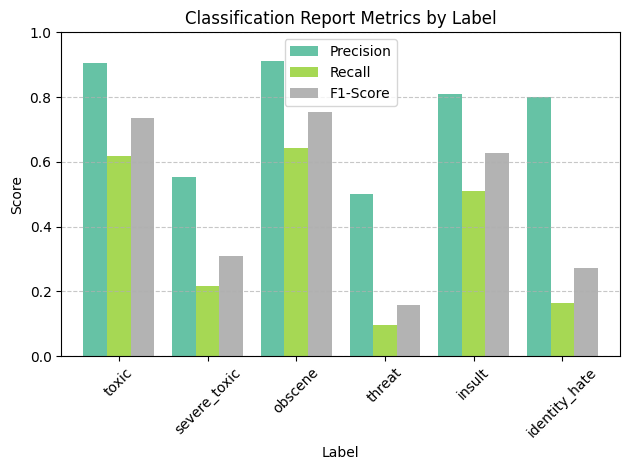

In [7]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Store metrics for all classes
labels = y_test.columns.tolist()
precision = []
recall = []
f1 = []

# Loop through each label
for i in range(len(labels)):
    report = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=0)
    precision.append(report['1']['precision'])
    recall.append(report['1']['recall'])
    f1.append(report['1']['f1-score'])

# Create DataFrame for plotting
metrics_df = pd.DataFrame({
    'Label': labels,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

# Plot
plt.figure(figsize=(12, 6))
metrics_df.set_index('Label').plot(kind='bar', colormap='Set2', width=0.8)
plt.title('Classification Report Metrics by Label')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
